In [1]:
#####################
### Project DSC530###
#####################

# This project is to analyze Exoplanets database from exoplanet.eu and answer my question:
# Are the ellipses perimeters influenced by the exoplanet detection methods?

# Exoplanets are beyond our solar system.
# When I started to code this project, there were 4082 exoplanets observations.

# I did the dataset search on exoplanet.eu.
# exoplanet.eu is an astronomy website founded in Paris with an Extrasolar Planets database which is constantly updated with new findings.
# This database has 129 columns or variables.
# This is a database that constantly is being updated with new observations.
# I will use the PyvO database as my dataset and will query exoplanets tables.
# PyvO lets find and retrieve astronomical data available from archives that support standard IVOA virtual observatory service protocols.

# To connect to exoplanet.eu database, I will use an API.
# The API was developed by the Virtual Observatory (VO).
# I will create an engine for connecting to the database.
# After connecting to the database, I will be able to extract the data with SQL instructions.


In [2]:
# Required Packages,

import pyvo
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkstats2 as ts2
import thinkplot as tp
import statsmodels.formula.api as smf

# I created this package which has functions required in this project
import dsc530 as dsc


In [3]:
# When I use a SQL to access remote data of the Virtual observatory (VO), the result is stored in a proprietary object, TAPResults.
# TAPResults is a container holding a table of matching catalog records. It is defined in Data Access (pyvo.dal), an affiliated package for the astropy package.

# I will work with pandas dataframe throughout the analysis, so I will have to make some conversions:
# 1. Convert initial TAPResults object to astropy table,
# 2. Convert astropy table object to numpy array,
# 3. Convert the numpy array to Pandas dataframe.
# I coded a function called, "ConvertDataframe" in my dsc530 package.
# This function converts a pyvo.dal.tap.TAPResults object by a pandas dataframe.

# Number of exoplanets observations:

sql = ('SELECT COUNT(*) AS total'
       '  FROM exoplanet.epn_core')

exoplanet_num = dsc.ConvertDataframe(sql)
print('Exoplanets discovered: {0}'.format(exoplanet_num.total[0]))


Exoplanets discovered: 4093


In [4]:
# This is the codebook of exoplanets database,

sql = ('SELECT * '
       '  FROM tap_schema.columns'
       ' WHERE table_name = \'exoplanet.epn_core\'')
codebook = dsc.ConvertDataframe(sql)
codebook


,table_name,column_name,description,unit,ucd,utype,datatype,arraysize,xtype,size,principal,indexed,std,sourcerd,column_index
0,b'exoplanet.epn_core',b'granule_uid',Internal table row index Unique ID in data ser...,b'',b'meta.id',b'',b'char',b'*',b'',-1,1,0,1,b'exoplanet/q',1
1,b'exoplanet.epn_core',b'granule_gid',Common to granules of same type (e.g. same map...,b'',b'meta.id',b'',b'char',b'*',b'',-1,1,0,1,b'exoplanet/q',2
2,b'exoplanet.epn_core',b'obs_id',Associates granules derived from the same data...,b'',b'meta.id',b'',b'char',b'*',b'',-1,1,0,1,b'exoplanet/q',3
3,b'exoplanet.epn_core',b'dataproduct_type',The high-level organization of the data produc...,b'',b'meta.code.class',b'Epn.dataProductType',b'char',b'*',b'',-1,1,0,1,b'exoplanet/q',4
4,b'exoplanet.epn_core',b'target_name',Standard IAU name of target (from a list relat...,b'',b'meta.id;src',b'Epn.TargetName',b'char',b'*',b'',-1,1,0,1,b'exoplanet/q',5
5,b'exoplanet.epn_core',b'target_class',"Type of target, from enumerated list",b'',b'meta.code.class;src',b'Epn.TargetClass',b'char',b'*',b'',-1,1,0,1,b'exoplanet/q',6
6,b'exoplanet.epn_core',b'time_min',Acquisition start time (in JD),b'd',b'time.start',b'',b'double',b'',b'',-1,1,0,0,b'exoplanet/q',7
7,b'exoplanet.epn_core',b'time_max',Acquisition stop time (in JD),b'd',b'time.end',b'',b'double',b'',b'',-1,1,0,0,b'exoplanet/q',8
8,b'exoplanet.epn_core',b'time_sampling_step_min',Sampling time for measurements of dynamical ph...,b's',b'time.interval;stat.min',b'Epn.Time.Time_sampling_step_min',b'double',b'',b'',-1,1,0,1,b'exoplanet/q',9
9,b'exoplanet.epn_core',b'time_sampling_step_max',Sampling time for measurements of dynamical ph...,b's',b'time.interval;stat.max',b'Epn.Time.Time_sampling_step_max',b'double',b'',b'',-1,1,0,1,b'exoplanet/q',10


In [5]:
# I will work with these variables:

# 1. mass: planetary mass.
# 2. period: orbital period around the star.
# 3. detection type: method used to discover the exoplanet
# 4. semi major axis: the semi-major axis is half of the longest diameter of an ellipse.
# 5. semi minor axis: [derived variable] minor semi-axis is a line segment that is at right angles with the semi-major axis and has one end at the center.
# 6. eccentricity: the eccentricity is a measure of how much an ellipse is squashed. This is the shape of the ellipse.
# 7. star distance: distance to a host star.
# 8. ellipse: [derived variable] total ellipse perimeter.

sql = ('SELECT UPPER(target_name) AS exoplanet,'
       '       ROUND(mass, 2) AS mass,'
       '       TRUNCATE(period) AS period,'
       '       detection_type AS detection,'
       '       semi_major_axis,'
       '       semi_major_axis * SQRT(1 - POWER(eccentricity, 2)) AS semi_minor_axis,'
       '       eccentricity,'
       '       UPPER(star_name) AS star,'
       '       star_distance,'
       '       star_teff AS star_temp'
       '  FROM exoplanet.epn_core'
       ' WHERE (1 - POWER(eccentricity, 2)) >= 0')

exoplanets = dsc.ConvertDataframe(sql)
exoplanets.head()


,exoplanet,mass,period,detection,semi_major_axis,semi_minor_axis,eccentricity,star,star_distance,star_temp
0,b'11 COM B',NaN,326.0,b'Radial Velocity',1.29,1.255110,0.231,b'11 COM',110.599998,4742.0
1,b'11 UMI B',NaN,516.0,b'Radial Velocity',1.54,1.535064,0.080,b'11 UMI',119.500000,4340.0
2,b'14 AND B',NaN,185.0,b'Radial Velocity',0.83,0.830000,0.000,b'14 AND',76.400002,4813.0
3,b'14 HER B',NaN,1773.0,b'Radial Velocity',2.77,2.574519,0.369,b'14 HER',18.100000,5311.0
4,b'16 CYG B B',NaN,799.0,b'Radial Velocity',1.68,1.217599,0.689,b'16 CYG B',21.410000,5766.0


In [6]:
# Variables into the pandas dataframe,

print('Variables: {0}'.format(exoplanets.columns))


Variables: Index(['exoplanet', 'mass', 'period', 'detection', 'semi_major_axis',
       'semi_minor_axis', 'eccentricity', 'star', 'star_distance',
       'star_temp'],
      dtype='object')


In [7]:
###########################
##detection type variable##
###########################

# detection type is the method used to discover exoplanets,

sql = ('SELECT UPPER(target_name) AS exoplanet,'
       '       detection_type AS detection'
       '  FROM exoplanet.epn_core'
       ' WHERE detection_type IS NOT NULL')

exoplanets = dsc.ConvertDataframe(sql)

print('{0} variable'.format(exoplanets.columns[1]))


detection variable


In [8]:
# Explore some observations of the detection type variable,

vdetection = exoplanets['detection']
print(vdetection.head())


0    b'Radial Velocity'
1            b'Imaging'
2    b'Radial Velocity'
3    b'Radial Velocity'
4    b'Radial Velocity'
Name: detection, dtype: object


In [9]:
# calculate frequency of exoplanet detection types,

fq_detection = exoplanets.detection.value_counts().sort_index()
print(fq_detection)


b'Astrometry'                1
b'Imaging'                 107
b'Microlensing'            100
b'Other'                     5
b'Primary Transit'        2967
b'Primary Transit#TTV'       2
b'Pulsar'                   41
b'Radial Velocity'         861
b'TTV'                       9
Name: detection, dtype: int64


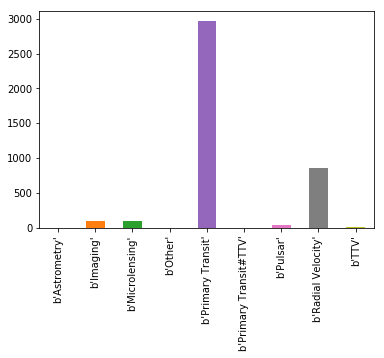

In [10]:
# Histogram of detection variable,

fq_detection.plot.bar()
plt.show()

# The most used method to find exoplanets is 'Primary Transit'
# primary transit is when a planet passes in front of its host star.


In [11]:
#################
##mass variable##
#################

# mass variable is the planetary mass.
# The exoplanets mass is expressed in jupMass.
# For example, an exoplanet with 21 jupMass is equivalent to 21 Jupiters.
# Jupiter is the largest planet in the solar system.
# Jupiter is so big that over 1,300 Earths could fit inside of it.

sql = ('SELECT UPPER(target_name) AS exoplanet,'
       '       mass'
       '  FROM exoplanet.epn_core'
       ' WHERE mass IS NOT NULL')

exoplanets = dsc.ConvertDataframe(sql)

print('{0} variable'.format(exoplanets.columns[1]))


mass variable


In [12]:
# Explore some observations of the mass variable,

vmass = exoplanets['mass']
print(vmass.head())


0    21.0
1    14.0
2    32.0
3    13.0
4    20.0
Name: mass, dtype: float32


In [13]:
# Descriptive characteristics about the mass variable expressed in Earth-size,

# Exoplanet mass expressed in Earth-size,
exoplanets['mass_earth'] = round(exoplanets.mass * 1300)

# Mean, Variance, and Standard Deviation,
mass_mean = exoplanets.mass_earth.mean()
mass_var = exoplanets.mass_earth.var()
mass_std = exoplanets.mass_earth.std()

print('The mass average is {0} Earth-size'.format(round(mass_mean)))
print('Total of mass differences from the mean: {0}'.format(round(mass_var)))
print('Standard deviation is {0}'.format(round(mass_std)))

# Standard Deviation is greater magnitude than mean,
# It can indicate that data are spread out or it has outliers.
# There is a significant difference between mass exoplanets.


The mass average is 7061 Earth-size
Total of mass differences from the mean: 253579520
Standard deviation is 15924


In [14]:
# Handle outliers of the mass variable,

# I will use data normalization with the Min-Max method,
exoplanets['mass_earth_MinMax'] = ((exoplanets['mass_earth'] - exoplanets['mass_earth'].min()) / (exoplanets['mass_earth'].max() - exoplanets['mass_earth'].min()))
exoplanets.head(10)


,exoplanet,mass,mass_earth,mass_earth_MinMax
0,b'11 OPH B',21.00,27300.0,0.256410
1,b'1RXS 1609 B',14.00,18200.0,0.170940
2,b'1RXS J235133.3+312720 B',32.00,41600.0,0.390720
3,b'2M 0103-55 (AB) B',13.00,16900.0,0.158730
4,b'2M 0122-24 B',20.00,26000.0,0.244200
5,b'2M 0219-39 B',13.90,18070.0,0.169719
6,b'2M 0441+23 B',7.50,9750.0,0.091575
7,b'2M 1938+46 B',1.90,2470.0,0.023199
8,b'2M 2140+16 B',20.00,26000.0,0.244200
9,b'51 PEG B',0.47,611.0,0.005739


The average mass is 1426 Earth-size


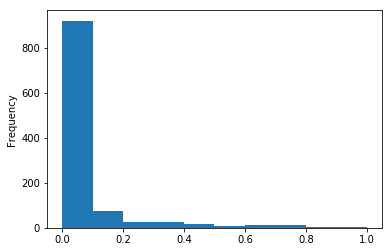

In [15]:
# Histogram of normalized mass variable,

exoplanets['mass_earth_MinMax'].plot(kind = 'hist')

# The mass histogram shows that the largest number of exoplanets discovered have a mass between 0.0 and 0.1
# I will calculate the average mass of exoplanets that are in the highest range,

mass01 = round(exoplanets.loc[exoplanets.mass_earth_MinMax <= 0.1].mass_earth.mean())
print('The average mass is {0} Earth-size'.format(mass01))


In [16]:
###################
##period variable##
###################

# period is the orbital period around the host star.

sql = ('SELECT UPPER(target_name) AS exoplanet,'
       '       period AS period_days,'
       '       ROUND(period/365, 2) AS period_years'
       '  FROM exoplanet.epn_core'
       ' WHERE period IS NOT NULL')

exoplanets = dsc.ConvertDataframe(sql)

print('{0} variable'.format(exoplanets.columns[1]))


period_days variable


In [17]:
# Explore some observations of the period variable in days and years,

exoplanets.head()


,exoplanet,period_days,period_years
0,b'11 COM B',326.029999,0.89
1,b'11 OPH B',730000.000000,2000.00
2,b'11 UMI B',516.219971,1.41
3,b'14 AND B',185.839996,0.51
4,b'14 HER B',1773.400024,4.86


In [18]:
# Descriptive characteristics about the period variable expressed in years,

# Mean, Variance, and Standard Deviation,
per_mean = exoplanets.period_years.mean()
per_var = exoplanets.period_years.var()
per_std = exoplanets.period_years.std()

print('The period average is {0} years'.format(round(per_mean)))
print('Total of mass differences from the mean: {0}'.format(round(per_var)))
print('Standard deviation is {0}'.format(round(per_std)))

# Standard Deviation is greater magnitude than mean,
# It can indicate that data are spread out or it has outliers.
# There is a significant difference between period exoplanets.


The period average is 2 years
Total of mass differences from the mean: 1464
Standard deviation is 38


In [19]:
# Handle mass outliers,

# I will use data normalization with the Min-Max method,
exoplanets['per_years_MinMax'] = ((exoplanets['period_years'] - exoplanets['period_years'].min()) / (exoplanets['period_years'].max() - exoplanets['period_years'].min()))
exoplanets.head(10)


,exoplanet,period_days,period_years,per_years_MinMax
0,b'11 COM B',326.029999,0.89,0.000445
1,b'11 OPH B',730000.000000,2000.00,1.000000
2,b'11 UMI B',516.219971,1.41,0.000705
3,b'14 AND B',185.839996,0.51,0.000255
4,b'14 HER B',1773.400024,4.86,0.002430
5,b'16 CYG B B',799.500000,2.19,0.001095
6,b'18 DEL B',993.299988,2.72,0.001360
7,b'1SWASP J1407 B',3725.000000,10.21,0.005105
8,b'24 BOO B',30.350599,0.08,0.000040
9,b'24 SEX B',452.799988,1.24,0.000620


The average period is 1.02 years


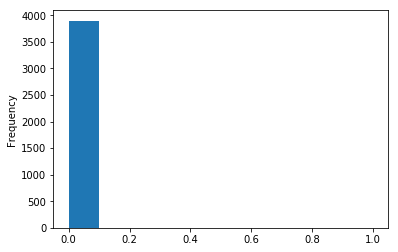

In [20]:
# Histogram of normalized period variable,

exoplanets['per_years_MinMax'].plot(kind = 'hist')

# The period histogram shows that most exoplanets discovered have not very large orbital periods.
# I will calculate the average period of exoplanets that are in the highest range,

period01 = round(exoplanets.loc[exoplanets.per_years_MinMax <= 0.1].period_years.mean(), 2)
print('The average period is {0} years'.format(period01))


In [21]:
####################
##ellipse variable##
####################

# The ellipse variable is a calculated variable.
# This variable indicates the total ellipse perimeter.
# I have to calculate the ellipse perimeter with semi_major_axis and semi_minor_axis variables, but
# the semi_minor_axis variable does not exist in the database. ALthough,
# the eccentricity variable exists in the database.
# I can calculate semi_minor_axis using eccentricity and semi_major_axis.

# Formula to calculate semi_minor_axis:
# semi_minor_axis [b] = semi_major_axis [a] * SQRT(1 - POWER(eccentricity, 2))

sql = ('SELECT UPPER(target_name) AS exoplanet,'
       '       semi_major_axis,'
       '       eccentricity,'       
       '       semi_major_axis * SQRT(1 - POWER(eccentricity, 2)) AS semi_minor_axis'
       '  FROM exoplanet.epn_core'
       ' WHERE semi_major_axis IS NOT NULL'
       '   AND eccentricity IS NOT NULL')

exoplanets = dsc.ConvertDataframe(sql)
exoplanets.head()


,exoplanet,semi_major_axis,eccentricity,semi_minor_axis
0,b'11 COM B',1.29,0.231,1.255110
1,b'11 UMI B',1.54,0.080,1.535064
2,b'14 AND B',0.83,0.000,0.830000
3,b'14 HER B',2.77,0.369,2.574519
4,b'16 CYG B B',1.68,0.689,1.217599


In [22]:
# Exoplanets percentage to which ellipse perimeter can be calculated,

per_data = round((len(exoplanets) * 100) / exoplanet_num.total[0],2)
print('ellipse perimeter can be calculated only in {0}% of exoplanets.'.format(per_data))


ellipse perimeter can be calculated only in 36.13% of exoplanets.


In [23]:
# I will calculate the ellipse perimeter using semi_major_axis and semi_minor_axis.
# I will use Ramanujan's formula which is more accurate:

# h = POWER(semi_major_axis - semi_minor_axis, 2) / POWER(semi_major_axis + semi_minor_axis, 2)
# ellipse = math.pi * (semi_major_axis + semi_minor_axis) * (1 + ((3 * h) / (10 + SQRT(4 - (3 * h)))))

# Calculate h,

exoplanets['h'] = pow(exoplanets.semi_major_axis - exoplanets.semi_minor_axis, 2) / pow(exoplanets.semi_major_axis + exoplanets.semi_minor_axis, 2)
exoplanets.head()


,exoplanet,semi_major_axis,eccentricity,semi_minor_axis,h
0,b'11 COM B',1.29,0.231,1.255110,1.879232e-04
1,b'11 UMI B',1.54,0.080,1.535064,2.576476e-06
2,b'14 AND B',0.83,0.000,0.830000,7.156889e-32
3,b'14 HER B',2.77,0.369,2.574519,1.337796e-03
4,b'16 CYG B B',1.68,0.689,1.217599,2.546601e-02


In [24]:
# Calculate ellipse parameter,

exoplanets['ellipse'] = round(math.pi * (exoplanets.semi_major_axis + exoplanets.semi_minor_axis) * (1 + ((3 * exoplanets.h) / (10 + np.sqrt(4 - (3 * exoplanets.h))))), 2)

# ellipse perimeter is in AU = 92,96 million miles.
# An astronomical unit (AU) is the average distance between the Earth and the Sun.
# The length of Earth's trajectory around the sun is 584 million miles, that is,
# its ellipse perimeter is 6.28 AUs.

exoplanets.head()


,exoplanet,semi_major_axis,eccentricity,semi_minor_axis,h,ellipse
0,b'11 COM B',1.29,0.231,1.255110,1.879232e-04,8.00
1,b'11 UMI B',1.54,0.080,1.535064,2.576476e-06,9.66
2,b'14 AND B',0.83,0.000,0.830000,7.156889e-32,5.22
3,b'14 HER B',2.77,0.369,2.574519,1.337796e-03,16.80
4,b'16 CYG B B',1.68,0.689,1.217599,2.546601e-02,9.16


In [25]:
# Descriptive characteristics about the ellipse variable expressed in AUs,

# Mean, Variance, and Standard Deviation,
ellipse_mean = exoplanets.ellipse.mean()
ellipse_var = exoplanets.ellipse.var()
ellipse_std = exoplanets.ellipse.std()

print('The ellipse average is {0} AUs'.format(round(ellipse_mean, 2)))
print('Total of mass differences from the mean: {0}'.format(round(ellipse_var)))
print('Standard deviation is {0} AUs'.format(round(ellipse_std, 2)))

# Standard Deviation is greater magnitude than mean,
# It can indicate that data are spread out or it has outliers.
# There is a significant difference between mass exoplanets.


The ellipse average is 8.26 AUs
Total of mass differences from the mean: 1137
Standard deviation is 33.72 AUs


In [26]:
# Handle outliers of ellipse variable,

# I will use data normalization with the Min-Max method,
exoplanets['ellipse_MinMax'] = ((exoplanets['ellipse'] - exoplanets['ellipse'].min()) / (exoplanets['ellipse'].max() - exoplanets['ellipse'].min()))
exoplanets.head(10)


,exoplanet,semi_major_axis,eccentricity,semi_minor_axis,h,ellipse,ellipse_MinMax
0,b'11 COM B',1.290,0.231,1.255110,1.879232e-04,8.00,0.011064
1,b'11 UMI B',1.540,0.080,1.535064,2.576476e-06,9.66,0.013369
2,b'14 AND B',0.830,0.000,0.830000,7.156889e-32,5.22,0.007205
3,b'14 HER B',2.770,0.369,2.574519,1.337796e-03,16.80,0.023280
4,b'16 CYG B B',1.680,0.689,1.217599,2.546601e-02,9.16,0.012674
5,b'18 DEL B',2.600,0.080,2.591667,2.576476e-06,16.31,0.022600
6,b'24 BOO B',0.190,0.042,0.189832,1.948246e-07,1.19,0.001610
7,b'24 SEX B',1.333,0.090,1.327590,4.134078e-06,8.36,0.011564
8,b'24 SEX C',2.080,0.290,1.990615,4.821753e-04,12.79,0.017714
9,b'2M 2140+16 B',3.530,0.260,3.408598,3.061295e-04,21.80,0.030221


The average ellipse is 5.68 AUs


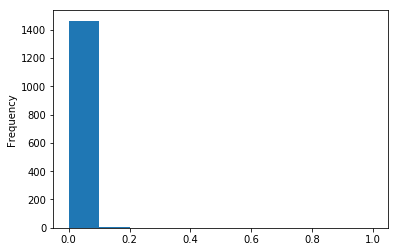

In [27]:
# Histogram of normalized ellipse,

exoplanets['ellipse_MinMax'].plot(kind = 'hist')

# The ellipse histogram shows that the largest number of exoplanets discovered have not a big trajectory around the sun.
# I will calculate the average ellipse of exoplanets that are in the highest range,

ellipse01 = round(exoplanets.loc[exoplanets.ellipse_MinMax <= 0.1].ellipse.mean(), 2)
print('The average ellipse is {0} AUs'.format(ellipse01))

# The Earth's trajectory around the sun is 6.28 AUs,
# most of the discovered exoplanets and with known ellipses, 
# revolve around their host star faster than Earth around the Sun.


In [28]:
##########################
##star distance variable##
##########################

# This is the distance of the star from Earth.
# Because the star distance is in pc = 3.26 light years,
# I will create a derived variable 'dis_ly' to calculate the star distance in light years.

sql = ('SELECT UPPER(star_name) AS star,'
       '       UPPER(target_name) AS exoplanet,'
       '       star_distance AS dist_pc,'
       '       ROUND((star_distance * 3.26), 2) AS dist_ly'
       '  FROM exoplanet.epn_core'
       ' WHERE star_distance IS NOT NULL')

exoplanets = dsc.ConvertDataframe(sql)

print('There are {0} stars with known distances'.format(len(exoplanets)))
exoplanets.head()


There are 2914 stars with known distances


,star,exoplanet,dist_pc,dist_ly
0,b'11 COM',b'11 COM B',110.599998,360.56
1,b'11 OPH',b'11 OPH B',145.000000,472.70
2,b'11 UMI',b'11 UMI B',119.500000,389.57
3,b'14 AND',b'14 AND B',76.400002,249.06
4,b'14 HER',b'14 HER B',18.100000,59.01


In [29]:
# The farthest star discovered to date,

faraway = exoplanets.loc[exoplanets.dist_ly == exoplanets['dist_ly'].max()]
faraway = faraway.reset_index(drop = True)
faraway = faraway.loc[:, ['star', 'dist_ly']]

print('The farthest star is {0} to {1} light years'.format(faraway['star'][0], faraway['dist_ly'][0]))

# The milky way is 100,000 light years across.
# Therefore, there are not exoplanets discovered in other galaxies.


The farthest star is b'XTE J1751-305' to 35860.0 light years


In [30]:
# Exoplanets that belong to that distant star,

exoplanets.loc[exoplanets.star == faraway['star'][0]].exoplanet
              

2865    b'XTE J1751-305 B'
Name: exoplanet, dtype: object

In [31]:
# The closest star discovered to date,

closeStart = exoplanets.loc[exoplanets.dist_ly == exoplanets['dist_ly'].min()]
closeStart = closeStart.reset_index(drop = True)
closeStart = closeStart.loc[:, ['star', 'dist_ly']]

print('The closest star is {0} to {1} light years'.format(closeStart['star'][0], closeStart['dist_ly'][0]))


The closest star is b'PROXIMA CENTAURI' to 4.22 light years


In [32]:
# Exoplanets that belong to that close star,

exoplanets.loc[exoplanets.star == closeStart['star'][0]].exoplanet


2659    b'PROXIMA CENTAURI B'
2660    b'PROXIMA CENTAURI C'
Name: exoplanet, dtype: object

In [33]:
# Descriptive characteristics about the distance variable,

dist_mean = exoplanets.dist_ly.mean()
dist_var = exoplanets.dist_ly.var()
dist_std = exoplanets.dist_ly.std()

print('The average distance is {0} light years'.format(round(dist_mean)))
print('Total of distances differences from the mean: {0}'.format(round(dist_var)))
print('Standard deviation is {0}'.format(round(dist_std)))

# Standard Deviation is greater magnitude than mean,
# It can indicate that data are spread out or it has outliers.
# There is a significant difference between farthest stars and closest stars.


The average distance is 2043 light years
Total of distances differences from the mean: 10690559
Standard deviation is 3270


In [34]:
# Handle outliers of distance variable,

# I will use data normalization with the Min-Max method,
exoplanets['dist_ly_MinMax'] = ((exoplanets['dist_ly'] - exoplanets['dist_ly'].min()) / (exoplanets['dist_ly'].max() - exoplanets['dist_ly'].min()))
exoplanets.head(10)


,star,exoplanet,dist_pc,dist_ly,dist_ly_MinMax
0,b'11 COM',b'11 COM B',110.599998,360.56,0.009938
1,b'11 OPH',b'11 OPH B',145.000000,472.70,0.013066
2,b'11 UMI',b'11 UMI B',119.500000,389.57,0.010747
3,b'14 AND',b'14 AND B',76.400002,249.06,0.006828
4,b'14 HER',b'14 HER B',18.100000,59.01,0.001528
5,b'16 CYG B',b'16 CYG B B',21.410000,69.80,0.001829
6,b'18 DEL',b'18 DEL B',73.099998,238.31,0.006529
7,b'1RXS 1609',b'1RXS 1609 B',145.000000,472.70,0.013066
8,b'1SWASP J1407',b'1SWASP J1407 B',133.000000,433.58,0.011975
9,b'24 BOO',b'24 BOO B',100.000000,326.00,0.008974


The average distance is 1194 light years


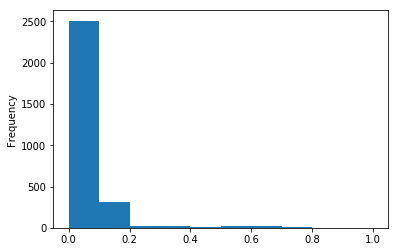

In [35]:
# Histogram of normalized distance,

exoplanets['dist_ly_MinMax'].plot(kind = 'hist')

# The distance histogram shows that the largest number of stars discovered are close to Earth.
# I will calculate the average distance of stars that are in the highest range,

dist01 = round(exoplanets.loc[exoplanets.dist_ly_MinMax <= 0.1].dist_ly.mean())
print('The average distance is {0} light years'.format(dist01))


In [36]:
#############################################################
### Probability Mass Functions (PMF)#########################
#############################################################
### Compare two scenarios in the exoplanets data using PMF###
#############################################################
    

In [37]:

# I will select exoplanets discovered with the Primary Transit method.
# Primary Transit is when a planet passes in front of its host star.

sql = ('SELECT UPPER(target_name) AS exoplanet,'
       '       detection_type AS detection,'
       '       ROUND(mass) AS mass,'
       '       ROUND((star_distance * 3.26)) AS dist_ly'
       '  FROM exoplanet.epn_core'
       ' WHERE detection_type IS NOT NULL')

exoplanets = dsc.ConvertDataframe(sql)


In [38]:
# Convert detection categorical variable to codes,

exoplanets['detection_cat'] = exoplanets.detection
exoplanets.detection_cat = pd.Categorical(exoplanets.detection_cat)
exoplanets['detection_cat'] = exoplanets.detection_cat.cat.codes
exoplanets.head()

,exoplanet,detection,mass,dist_ly,detection_cat
0,b'11 COM B',b'Radial Velocity',NaN,361.0,7
1,b'11 OPH B',b'Imaging',21.0,473.0,1
2,b'11 UMI B',b'Radial Velocity',NaN,390.0,7
3,b'14 AND B',b'Radial Velocity',NaN,249.0,7
4,b'14 HER B',b'Radial Velocity',NaN,59.0,7


In [39]:
# Filter exoplanets discovered with the Primary Transit method,

transit = exoplanets[exoplanets.detection_cat == 4]
print('{0} exoplanets discovered with the Primary Transit method.'.format(len(transit)))
transit.head()


2967 exoplanets discovered with the Primary Transit method.


,exoplanet,detection,mass,dist_ly,detection_cat
9,b'1SWASP J1407 B',b'Primary Transit',NaN,434.0,4
30,b'38 VIR B',b'Primary Transit',NaN,NaN,4
39,b'55 CNC E',b'Primary Transit',0.0,40.0,4
54,b'AD 3116 B',b'Primary Transit',54.0,608.0,4
65,b'BD+20 594 B',b'Primary Transit',0.0,496.0,4


369


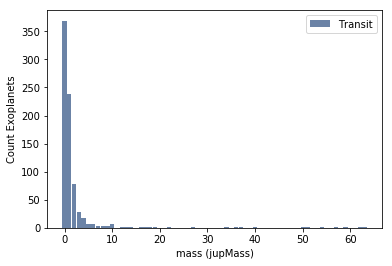

In [40]:
# Histogram of mass variable in the Primary Transit method,

hist_mass = ts2.Hist(transit.mass, label = 'Transit')
print(hist_mass[0])
tp.Hist(hist_mass)
tp.Config(xlabel = 'mass (jupMass)', ylabel = 'Count Exoplanets')


In [41]:
# Normalize the distribution. 

# I will divide by the total count of mass:

count_mass = hist_mass.Total()
pmf_mass = hist_mass.Copy()
for x, freq in hist_mass.Items():
    pmf_mass[x] = freq / count_mass


In [42]:
# Example,
# What is the probability of discovering an exoplanet with the Primary Transit method whose mass is 1 Jupiter?

print('Probability {0}% of discovering an exoplanet with 1 Jupiter mass with the Primary Transit method.'.format(round((pmf_mass[1] * 100), 2)))


Probability 30.45% of discovering an exoplanet with 1 Jupiter mass with the Primary Transit method.


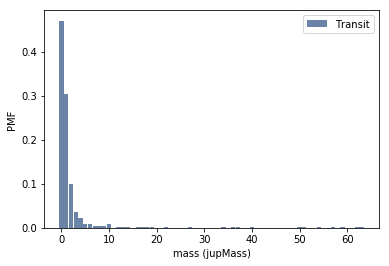

In [43]:
# PMF histogram of mass variable in the Primary Transit method,

tp.Hist(pmf_mass)
tp.Config(xlabel = 'mass (jupMass)', ylabel = 'PMF')

In [44]:
# PFM of star distance in the Primary Transit method,

pmf_dist_ly = ts2.Pmf(transit.dist_ly, label = 'Transit')


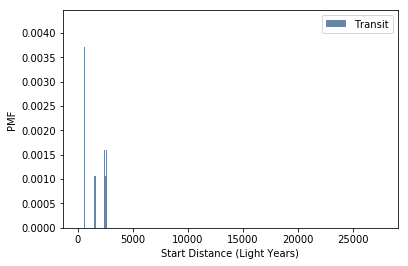

In [45]:
# Histogram of star distance in the Primary Transit method,

tp.Hist(pmf_dist_ly)
tp.Config(xlabel = 'Start Distance (Light Years)', ylabel = 'PMF')


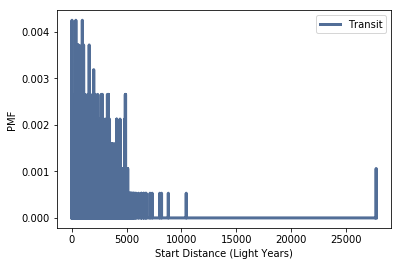

In [46]:
# PMF Histogram of star distance in the Primary Transit method,

tp.Pmf(pmf_dist_ly)
tp.Config(xlabel = 'Start Distance (Light Years)', ylabel = 'PMF')

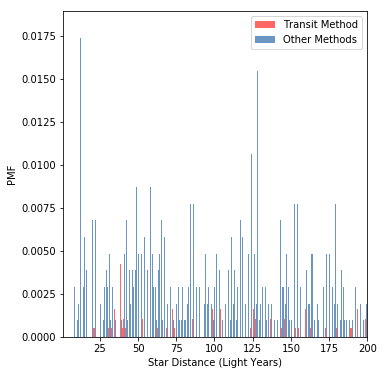

In [47]:
# PMF Histogram of star distance in the Primary Transit method and other methods,

other_methods = exoplanets[exoplanets.detection_cat != 4]

transit_pmf = ts2.Pmf(transit.dist_ly, label = 'Transit Method')
otherMethods_pmf = ts2.Pmf(other_methods.dist_ly, label = 'Other Methods')

width = 0.5
axis = [1, 200, 0, 0.019]

tp.PrePlot(2, cols = 2)
tp.Hist(transit_pmf, align = 'right', width = width, color = 'red')
tp.Hist(otherMethods_pmf, align = 'left', width = width)
tp.Config(xlabel = 'Star Distance (Light Years)', ylabel = 'PMF', axis = axis)


In [48]:
############################################
###Cumulative Distribution Function (CDF)###
############################################


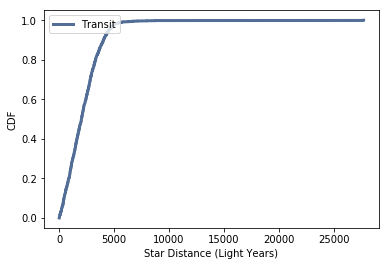

In [49]:
cdf_dist = ts2.Cdf(transit.dist_ly, label = 'Transit')
tp.Cdf(cdf_dist)
tp.Config(xlabel = 'Star Distance (Light Years)', ylabel = 'CDF', loc = 'upper left')


In [50]:
# Get the probability that corresponds to star distances.
# For example, What is the probability that start distances are less 5,000 light years in the Primary Transit method?

print('{0}% of star distances are less than or equal to 5000 light years in the Primary Transit method.'.format(round((cdf_dist.Prob(5000) * 100), 2)))


97.71% of star distances are less than or equal to 5000 light years in the Primary Transit method.


In [51]:
# Average star distance in the Primary Transit method,

print('The median is {0} light years in the Primary Transit method.'.format(round(cdf_dist.Value(0.5))))


The median is 2034.0 light years in the Primary Transit method.


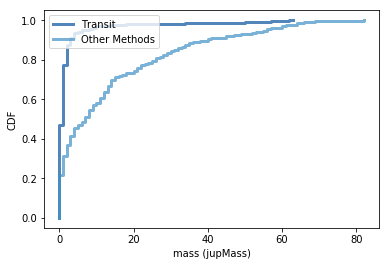

In [52]:
# visualize two distributions,
#   1. Primary Transit detection method
#   2. Other detection methods

transit_cdf = ts2.Cdf(transit.mass, label = 'Transit')
othermethods_cdf = ts2.Cdf(other_methods.mass, label = 'Other Methods')

tp.PrePlot(2)
tp.Cdfs([transit_cdf, othermethods_cdf])
tp.Config(xlabel = 'mass (jupMass)', ylabel = 'CDF')

# Large exoplanets are more likely to find them with the Primary Transit detection method.


In [53]:
# For example,
# Exoplanets with 20 jupiter-mass have a high probability of beging found with the Primary Transit detection method.

print('{0}% probability of finding exoplanets with 20 jupiter-mass in the Primary Transit detection method.'.format(round(transit_cdf.Prob(20), 2) * 100))
print('{0}% probability of finding exoplanets with 20 jupiter-mass in other methods.'.format(round(othermethods_cdf.Prob(20), 2) * 100))


98.0% probability of finding exoplanets with 20 jupiter-mass in the Primary Transit detection method.
74.0% probability of finding exoplanets with 20 jupiter-mass in other methods.


In [54]:
#############################
###Analytical Distribution###
#############################

In [55]:
# I will use the ellipse (perimeter) variable,
# ellipse perimeter is in AU = 92,96 million miles.
# The length of Earth's trajectory around the sun is 6.28 AUs.

sql = ('SELECT UPPER(target_name) AS exoplanet,'
       '       semi_major_axis,'
       '       eccentricity,'       
       '       semi_major_axis * SQRT(1 - POWER(eccentricity, 2)) AS semi_minor_axis'
       '  FROM exoplanet.epn_core'
       ' WHERE semi_major_axis IS NOT NULL'
       '   AND eccentricity IS NOT NULL')

exoplanets = dsc.ConvertDataframe(sql)

exoplanets['h'] = pow(exoplanets.semi_major_axis - exoplanets.semi_minor_axis, 2) / pow(exoplanets.semi_major_axis + exoplanets.semi_minor_axis, 2)
exoplanets['ellipse'] = round(math.pi * (exoplanets.semi_major_axis + exoplanets.semi_minor_axis) * (1 + ((3 * exoplanets.h) / (10 + np.sqrt(4 - (3 * exoplanets.h))))), 2)


In [56]:
#Create and fit the ellipse model.

# Estimate ellipse parameters: mean, variance, and standard deviation,
# Trimming outliers: p is the fraction of values to trim off each end.

vellipse = exoplanets.ellipse.dropna()
ellipse_mean, ellipse_var = ts2.TrimmedMeanVar(vellipse, p = 0.04)

print('Ellipse average {0} AUs'.format(round(ellipse_mean, 2)))
print('Ellipse variance: {0}'.format(round(ellipse_var, 2)))

ellipse_std = np.sqrt(ellipse_var)
print('Standard deviation is {0} AUs'.format(round(ellipse_std, 2)))


Ellipse average 4.75 AUs
Ellipse variance: 43.23
Standard deviation is 6.58 AUs


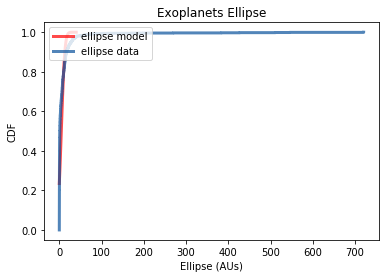

In [57]:
# Plot the ellipse model,

# Up to 40 AUs,
ellipse_xs, ellipse_ps = ts2.RenderNormalCdf(ellipse_mean, ellipse_std, low = 0, high = 40)
tp.Plot(ellipse_xs, ellipse_ps, label = 'ellipse model', color = 'red')

# plot the data

cdf = ts2.Cdf(vellipse, label = 'ellipse data')

tp.PrePlot(1)
tp.Cdf(cdf) 
tp.Config(title = 'Exoplanets Ellipse',
          xlabel = 'Ellipse (AUs)',
          ylabel = 'CDF')

# This is the CDF and the model.
# It seems that the ellipse model doesn't fit the data well.
# I will take the segment between 0 and 40AUs

In [58]:
# Filter ellipse variable between 0 and 40AUs,

exoplanets1 = exoplanets[exoplanets.ellipse <= 40]

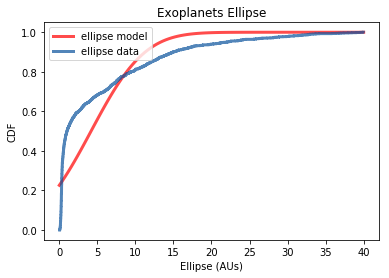

In [59]:
# re-plot the ellipse model,

vellipse = exoplanets1.ellipse.dropna()
ellipse_mean, ellipse_var = ts2.TrimmedMeanVar(vellipse, p = 0.04)
ellipse_std = np.sqrt(ellipse_var)

ellipse_xs, ellipse_ps = ts2.RenderNormalCdf(ellipse_mean, ellipse_std, low = 0, high = 40)
tp.Plot(ellipse_xs, ellipse_ps, label = 'ellipse model', color = 'red')

cdf = ts2.Cdf(vellipse, label = 'ellipse data')
tp.PrePlot(1)
tp.Cdf(cdf) 
tp.Config(title = 'Exoplanets Ellipse',
          xlabel = 'Ellipse (AUs)',
          ylabel = 'CDF')

# In the CDF and the model, the ellipse model doesn't fit the data well.


In [60]:
# Normal probability plot for exoplanets ellipses,

# Estimate ellipse parameters: mean, variance, and standard deviation,
# Trimming outliers: p is the fraction of values to trim off each end.

vellipse = exoplanets.ellipse.dropna()
ellipse_mean, ellipse_var = ts2.TrimmedMeanVar(vellipse, p = 0.04)
ellipse_std = np.sqrt(ellipse_var)
print('Standard deviation is {0} AUs'.format(round(ellipse_std, 2)))


Standard deviation is 6.58 AUs


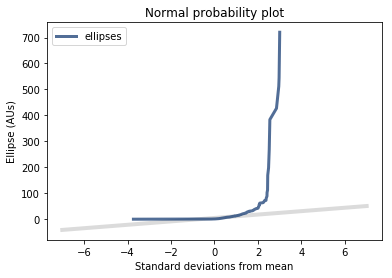

In [61]:
# Normal probability plot,

xs = [-7, 7]
fxs, fys = ts2.FitLine(xs, ellipse_mean, ellipse_std)
tp.Plot(fxs, fys, linewidth = 4, color = '0.8')

xs, ys = ts2.NormalProbability(vellipse)
tp.Plot(xs, ys, label = 'ellipses')

tp.Config(title='Normal probability plot',
          xlabel='Standard deviations from mean',
          ylabel='Ellipse (AUs)')

# In the normal probability plot for ellipses,
# we can seen the perimeter of the short ellipses is longer than normal.
# And the perimeter of the long ellipses is longer than normal.


In [62]:
########################################
###Correlation and Causation Analysis###
########################################

In [63]:
# I will compare two variables, period and ellipse.
# The ellipse variable is a calculated variable.
# This variable indicates the total ellipse perimeter.
# period is the orbital period around the host star.
# I will filter some period outliers of more than 100 years.

sql = ('SELECT UPPER(target_name) AS exoplanet,'
       '       period AS period_days,'
       '       ROUND(period/365, 2) AS period_years,'
       '       semi_major_axis,'
       '       eccentricity,'       
       '       semi_major_axis * SQRT(1 - POWER(eccentricity, 2)) AS semi_minor_axis'
       '  FROM exoplanet.epn_core'
       ' WHERE semi_major_axis IS NOT NULL'
       '   AND eccentricity IS NOT NULL'
       '   AND period IS NOT NULL'
       '   AND ROUND(period/365, 2) <= 100')

exoplanets = dsc.ConvertDataframe(sql)

exoplanets['h'] = pow(exoplanets.semi_major_axis - exoplanets.semi_minor_axis, 2) / pow(exoplanets.semi_major_axis + exoplanets.semi_minor_axis, 2)
exoplanets['ellipse'] = round(math.pi * (exoplanets.semi_major_axis + exoplanets.semi_minor_axis) * (1 + ((3 * exoplanets.h) / (10 + np.sqrt(4 - (3 * exoplanets.h))))), 2)
print(len(exoplanets))
exoplanets.head()

1466


,exoplanet,period_days,period_years,semi_major_axis,eccentricity,semi_minor_axis,h,ellipse
0,b'11 COM B',326.029999,0.89,1.29,0.231,1.255110,1.879232e-04,8.00
1,b'11 UMI B',516.219971,1.41,1.54,0.080,1.535064,2.576476e-06,9.66
2,b'14 AND B',185.839996,0.51,0.83,0.000,0.830000,7.156889e-32,5.22
3,b'14 HER B',1773.400024,4.86,2.77,0.369,2.574519,1.337796e-03,16.80
4,b'16 CYG B B',799.500000,2.19,1.68,0.689,1.217599,2.546601e-02,9.16


In [64]:
# I will select period and ellipse variables,
vperiod, vellipse = exoplanets.period_years, exoplanets.ellipse


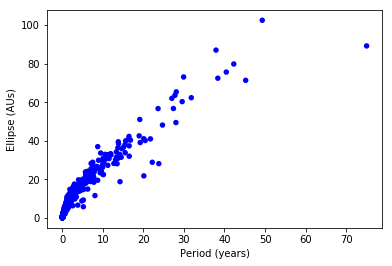

In [65]:
# Scatter plot with alpha = 1. Each point is fully saturated,

tp.Scatter(vperiod, vellipse, alpha = 1)
tp.Config(xlabel = 'Period (years)',
          ylabel = 'Ellipse (AUs)',
          legend = False)


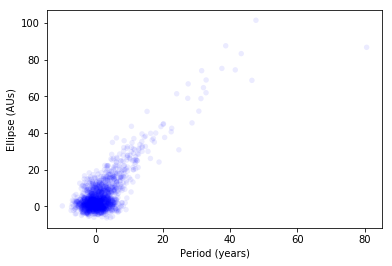

In [66]:
# I will use jitter (noise) with normal distribution to improve the visualization,
    
vperiod = dsc.Jitter(vperiod, 2.9)
vellipse = dsc.Jitter(vellipse, 2.5)

tp.Scatter(vperiod, vellipse, alpha = 0.08)
tp.Config(xlabel = 'Period (years)',
          ylabel = 'Ellipse (AUs)',
          #axis=[140, 210, 20, 200],
          legend = False)

# This scatter version shows the distribution most accurately.
# Zero years means that the period of rotation around the sun is done in less than a year.
# That is, in some months, weeks, or days.
# Zero ellipse means that the distance traveled is less than one AU.
# That is, the distance traveled can be one sixth or less of the Earth's travel.
# In the scatter, I can see that in most of the exoplanets, the distance traveled and the time used is proportional.


In [67]:
# Computes the covariance of period and ellipse variables,

cov = dsc.Cov(vperiod, vellipse)
print('The covariance between period and ellipse is {0}'.format(round(cov, 2)))


The covariance between period and ellipse is 50.39


In [68]:
# Find the correlation between period and ellipse variables,

corr = dsc.Corr(vperiod, vellipse)
print('The correlation between period and ellipse is {0}'.format(round(corr, 2)))

# Both variables have a strong correlation.


The correlation between period and ellipse is 0.8


In [69]:
# Find the Spearman correlation between period and ellipse variables,

spearman = dsc.SpearmanCorr(vperiod, vellipse)
print('The Spearman correlation between period and ellipse is {0}'.format(round(spearman, 2)))

# In Spearman's correlation, the correlation is a lower.


The Spearman correlation between period and ellipse is 0.42


In [70]:
######################################
###Conduct a test on my hypothesis###
#####################################

# My hypothesis is that there are differences in the ellipses of exoplanets that are discovered by the Primary Transit method and other methods.
# The null hypothesis (H_0) is that there is not difference between Primary Transit method and other methods;
# that is, that ellipses perimeter for both groups have the same distribution.


In [71]:
# I will select exoplanets discovered with the Primary Transit method and others methods.

sql = ('SELECT UPPER(target_name) AS exoplanet,'
       '       detection_type AS detection,'
       '       semi_major_axis,'
       '       eccentricity,'       
       '       semi_major_axis * SQRT(1 - POWER(eccentricity, 2)) AS semi_minor_axis,'
       '       period AS period_days,'
       '       ROUND(period/365, 2) AS period_years'       
       '  FROM exoplanet.epn_core'
       ' WHERE semi_major_axis IS NOT NULL'
       '   AND eccentricity IS NOT NULL'
       '   AND detection_type IS NOT NULL'
       '   AND ROUND(period/365, 2) <= 100')

exoplanets = dsc.ConvertDataframe(sql)

# Calculate ellipse variable,

exoplanets['h'] = pow(exoplanets.semi_major_axis - exoplanets.semi_minor_axis, 2) / pow(exoplanets.semi_major_axis + exoplanets.semi_minor_axis, 2)
exoplanets.head()

exoplanets['ellipse'] = round(math.pi * (exoplanets.semi_major_axis + exoplanets.semi_minor_axis) * (1 + ((3 * exoplanets.h) / (10 + np.sqrt(4 - (3 * exoplanets.h))))), 2)

# Convert detection categorical variable to codes,

exoplanets['detection_cat'] = exoplanets.detection
exoplanets.detection_cat = pd.Categorical(exoplanets.detection_cat)
exoplanets['detection_cat'] = exoplanets.detection_cat.cat.codes

# Filter exoplanets discovered with the Primary Transit method and other methods,

transit = exoplanets[exoplanets.detection_cat == 4]
other_methods = exoplanets[exoplanets.detection_cat != 4]


In [72]:
# First group, Primary Transit method,

transit.head()

,exoplanet,detection,semi_major_axis,eccentricity,semi_minor_axis,period_days,period_years,h,ellipse,detection_cat
14,b'38 VIR B',b'Primary Transit',1.820000,0.030,1.819181,825.900024,2.26,5.067059e-08,11.43,4
23,b'55 CNC E',b'Primary Transit',0.015439,0.028,0.015433,0.736548,0.00,3.844614e-08,0.10,4
43,b'BD+20 594 B',b'Primary Transit',0.241000,0.000,0.241000,41.685501,0.11,5.305501e-32,1.51,4
57,b'COROT-1 B',b'Primary Transit',0.025400,0.000,0.025400,1.508960,0.00,1.679174e-31,0.16,4
58,b'COROT-10 B',b'Primary Transit',0.105500,0.530,0.089464,13.240600,0.04,6.765466e-03,0.61,4


In [73]:
# Other detection methods,

other_methods.head()


,exoplanet,detection,semi_major_axis,eccentricity,semi_minor_axis,period_days,period_years,h,ellipse,detection_cat
0,b'11 COM B',b'Radial Velocity',1.29,0.231,1.255110,326.029999,0.89,1.879232e-04,8.00,7
1,b'11 UMI B',b'Radial Velocity',1.54,0.080,1.535064,516.219971,1.41,2.576476e-06,9.66,7
2,b'14 AND B',b'Radial Velocity',0.83,0.000,0.830000,185.839996,0.51,7.156889e-32,5.22,7
3,b'14 HER B',b'Radial Velocity',2.77,0.369,2.574519,1773.400024,4.86,1.337796e-03,16.80,7
4,b'16 CYG B B',b'Radial Velocity',1.68,0.689,1.217599,799.500000,2.19,2.546601e-02,9.16,7


In [74]:
# Permutation test,

#data = transit.ellipse.values, other_methods.ellipse.values
data = other_methods.ellipse.values, transit.ellipse.values
ht = ts2.DiffMeansPermute(data)

print('p-value is {0}'.format(ht.PValue()))

# A small p-value indicates that the observations are inconsistent with the Null hypothesis.
# So we reject the null hypothesis (there is not difference).
# Therefore, there is a significant difference in the ellipse perimeters
# when exoplanets are discovered by the Primary Transit method and other methods.


p-value is 0.0


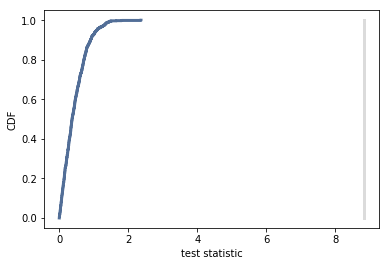

In [75]:
# distribution of the test statistic,

ht.PlotCdf()
tp.Config(xlabel = 'test statistic',
          ylabel = 'CDF')


In [76]:
#########################
###Regression Analysis###
#########################

In [77]:
# Ellipse as a function of period,

formula = 'ellipse ~ period_years'
model = smf.ols(formula, data = transit)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ellipse   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     5763.
Date:                Sat, 16 Nov 2019   Prob (F-statistic):          3.04e-314
Time:                        15:34:40   Log-Likelihood:                -685.25
No. Observations:                 616   AIC:                             1375.
Df Residuals:                     614   BIC:                             1383.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5015      0.030     16.613      0.000       0.442       0.561
period_years     3.4247      0.045     75.914      0.000       3.336       3.513
==============================================================================
Omnibus:                      240.285   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39897.376
Skew:                           0.536   Prob(JB):                         0.00
Kurtosis:                      42.412   Cond. No.                         1.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# Intercep and Slope,

inter = results.params['Intercept']
slope = results.params['period_years']
inter, slope


(0.5015045154559239, 3.4246696391721168)

In [79]:
# The p-value of the slope estimate,

slope_pvalue = results.pvalues['period_years']
slope_pvalue

3.0393332957e-314

In [80]:
# The coefficient of determination,

results.rsquared

# The coefficient of determination explains in a 90% the variability between period and ellipse.


0.9037145023364705

In [81]:
# difference in ellipse perimeters between transit method and other methods,

diff_ellipse = transit.ellipse.mean() - transit.ellipse.mean()
diff_ellipse

# The average of the ellipses found in both detection methods is the same.


0.0

In [82]:
# Difference in periods between transit method and other methods,

diff_period = transit.period_years.mean() - other_methods.period_years.mean()
diff_period

# With other detection methods, different to Primary Transit method,
# we can find exoplanets with greater orbital periods.


-2.8593877005347643